# Reading licel files

In [1]:
# Import plotting library
from matplotlib import pyplot as plt

import glob

# Import the module for licel files
from atmospheric_lidar import licel
import atmospheric_lidar

print(atmospheric_lidar.__version__)


0.5.5


In [2]:
# Read the file
licel_file = licel.LicelFile('./sample_data/measurement_1/a24C0506.105499')

# The licel file object has several properties describing the file
print("Start time: {}, Stop times: {}".format(licel_file.start_time, licel_file.stop_time))


Start time: 2024-12-05 06:10:14+00:00, Stop times: 2024-12-05 06:10:54+00:00


In [3]:
# See available channel
# Note that the channels have a semi-descriptive name.
# This does not work always and you might need to set "use_id_as_name=True" when reading the file.
print("Available channels: ", licel_file.channels.keys())

Available channels:  odict_keys(['00355.o_an', '00355.o_std_an', '00355.o_ph', '00355.o_std_ph', '00395.s_an', '00395.s_std_an', '00395.s_ph', '00395.s_std_ph', '00353.o_an', '00353.o_std_an', '00353.o_ph', '00353.o_std_ph', '00371.o_an', '00371.o_std_an', '00371.o_ph', '00371.o_std_ph', '00395.p_an', '00395.p_std_an', '00395.p_ph', '00395.p_std_ph', '00460.o_an', '00460.o_std_an', '00460.o_ph', '00460.o_std_ph', '00532.o_an', '00532.o_std_an', '00532.o_ph', '00532.o_std_ph', '00530.o_an', '00530.o_std_an', '00530.o_ph', '00530.o_std_ph'])


In [4]:
# Get one channel of interest
channel = licel_file.channels['00355.o_an']

# The channel object has several properties describing the channel data. E.g.
print("Channel name: ", channel.channel_name)
print('Channel id: ', channel.id)
print("Wavelength: ", channel.wavelength)
print("Number of shots: ", channel.number_of_shots)
print("Is analog?: ", channel.is_analog)
print("ADC bits: ", channel.adcbits)

Channel name:  00355.o_an
Channel id:  BT0
Wavelength:  355
Number of shots:  4094
Is analog?:  True
ADC bits:  16


In [5]:
# Data are stored in the .data property, already converted in physical quantities
channel.data

array([5.19810471, 5.19452849, 5.21041927, ..., 5.20033355, 5.20016583,
       5.19995338], shape=(16380,))

Text(0.5, 0, 'Range (m)')

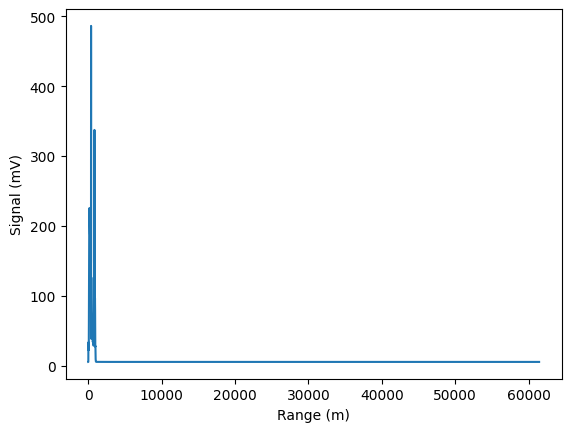

In [6]:
plt.plot(channel.z, channel.data)
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')

# Reading a measurement (multiple files)

In [7]:
# Find files in directory
files = glob.glob('./sample_data/measurement_1/*')
print(files)


['./sample_data/measurement_1\\a24C0506.105499', './sample_data/measurement_1\\a24C0506.113644', './sample_data/measurement_1\\a24C0506.121789']


In [8]:
# Read all files
measurements = licel.LicelLidarMeasurement(files)

In [9]:
# Print available channels
print("Available channels: ", measurements.channels.keys())

Available channels:  odict_keys(['00355.o_an', '00355.o_std_an', '00355.o_ph', '00355.o_std_ph', '00395.s_an', '00395.s_std_an', '00395.s_ph', '00395.s_std_ph', '00353.o_an', '00353.o_std_an', '00353.o_ph', '00353.o_std_ph', '00371.o_an', '00371.o_std_an', '00371.o_ph', '00371.o_std_ph', '00395.p_an', '00395.p_std_an', '00395.p_ph', '00395.p_std_ph', '00460.o_an', '00460.o_std_an', '00460.o_ph', '00460.o_std_ph', '00532.o_an', '00532.o_std_an', '00532.o_ph', '00532.o_std_ph', '00530.o_an', '00530.o_std_an', '00530.o_ph', '00530.o_std_ph'])


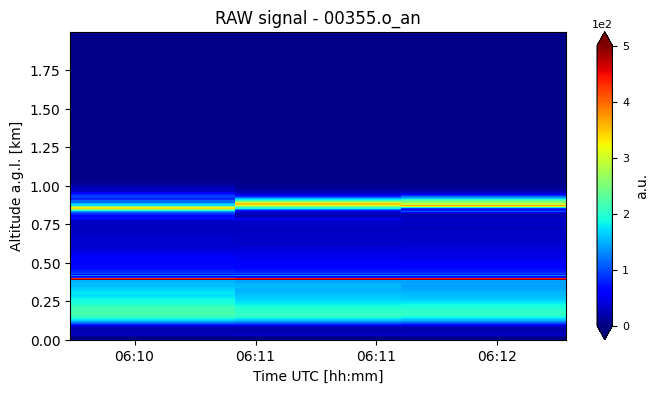

In [10]:
# Plot a single channel
measurements.channels['00355.o_an'].plot(signal_type='raw', zoom=[0, 2000, 0, None], vmax=500)

In [11]:
# Subset by channels
subset_channels = measurements.subset_by_channels(['00355.o_an', '00395.s_an', '00353.o_an'])
print("Available channels: ", subset_channels.channels.keys())

Available channels:  dict_keys(['00355.o_an', '00395.s_an', '00353.o_an'])


In [27]:
# Subset by bins
subset_bins = subset_channels.subset_by_bins(5, 20)

In [29]:
subset_bins.channels['00353.o_an'].z

array([20.625, 24.375, 28.125, 31.875, 35.625, 39.375, 43.125, 46.875,
       50.625, 54.375, 58.125, 61.875, 65.625, 69.375, 73.125])

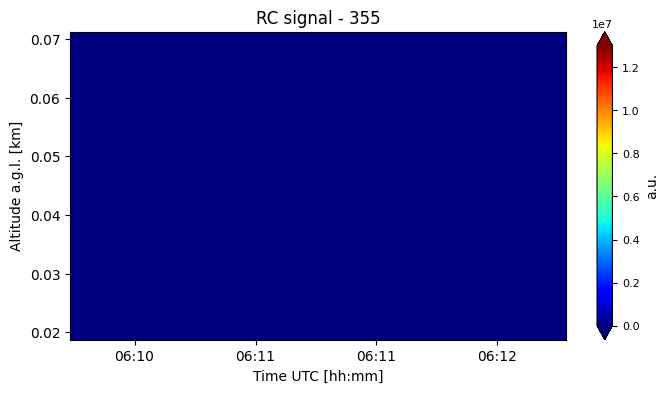

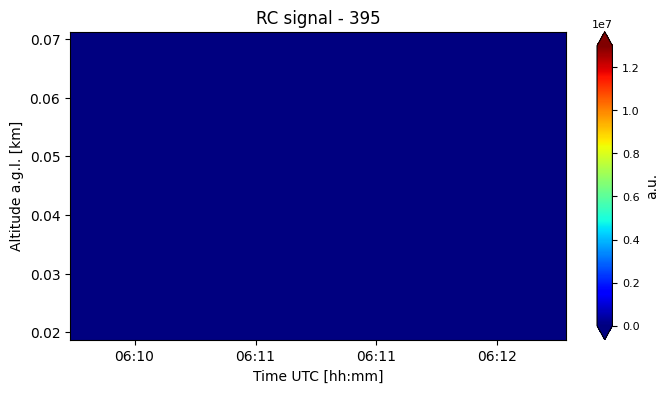

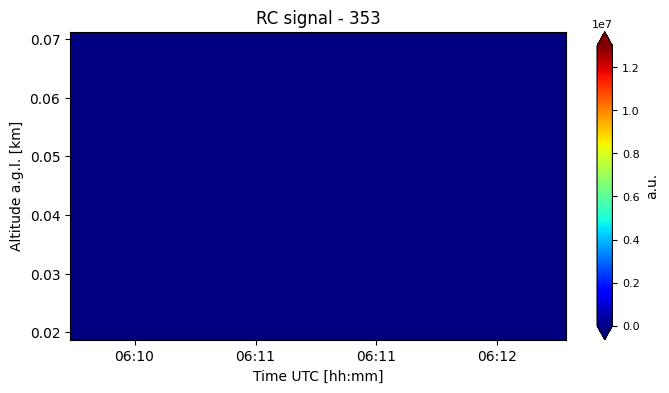

In [30]:
# Plot all channels
subset_bins.plot()

In [31]:
# Getting matrix of data
data = subset_bins.channels['00355.o_an'].matrix
print(data)
print(data.shape)

[[ 7.78800873 22.30458081 33.17983555 24.31728456 23.04757665 28.1963933
  25.4059267  23.83811997 24.49912932 23.10558815 22.57724544 22.77181847
  22.16331932 22.16841249 22.98660206]
 [ 7.7232287  22.18059846 33.25976651 24.26185786 22.63200871 27.66072485
  24.75216482 23.36490579 24.39317527 22.97720588 22.03650059 21.8985861
  21.22586412 21.04026239 21.8675742 ]
 [ 7.87005858 22.55995139 33.25337628 24.04826883 22.62729198 27.52650398
  24.56065739 23.32848951 24.20113486 22.40551622 21.28522858 21.20313027
  20.70327244 20.69044726 21.33015212]]
(3, 15)


Text(0.5, 0, 'Range (m)')

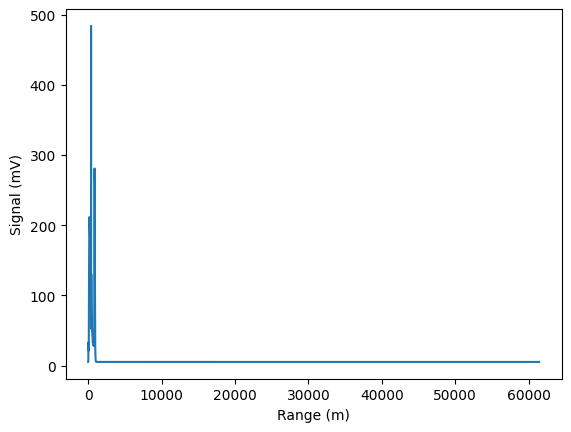

In [32]:
# Average of data
channel = subset_channels.channels['00355.o_an']
plt.plot(channel.z, channel.average_profile())
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')